In [37]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import the dataset
diabetes_df = pd.read_csv("diabetes_dirty.csv")
diabetes_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


The diabetes_dirty.csv aims to predict a person's progression in the condition 
with respect to various attributes about them

In [38]:
# Differentiate between the independent variables and the dependent variable, 
# and assign them to variables X and Y

# I would say Progression is the dependent variable (variable being predicted)
# and all other columns are the independent variables, although not sure 
# what BP, S1, S2 etc mean.

X= diabetes_df.drop(columns=['PROGRESSION'])
Y = diabetes_df['PROGRESSION']



In [39]:
# Generate training and test sets comprising 80% and 20% of the data respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# I have gone with Shuffle=false here, but should it be true?

print("X_train {}".format(X_train))
print("X_test {}".format(X_test))
print("Y_train {}".format(Y_train))
print("Y_test {}".format(Y_test))

X_train      AGE  SEX   BMI     BP   S1     S2    S3   S4      S5   S6
0     59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598   87
1     48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918   69
2     72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728   85
3     24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903   89
4     50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905   80
..   ...  ...   ...    ...  ...    ...   ...  ...     ...  ...
348   57    1  24.5   93.0  186   96.6  71.0  3.0  4.5218   91
349   49    2  21.0   82.0  119   85.4  23.0  5.0  3.9703   74
350   41    2  32.0  126.0  198  104.2  49.0  4.0  5.4116  124
351   25    2  22.6   85.0  130   71.0  48.0  3.0  4.0073   81
352   52    2  19.7   81.0  152   53.4  82.0  2.0  4.4188   82

[353 rows x 10 columns]
X_test      AGE  SEX   BMI      BP   S1     S2    S3    S4      S5   S6
353   34    1  21.2   84.00  254  113.4  52.0  5.00  6.0936   92
354   42    2  30.6  101.00  269  172.2  50.0  5.00  5.4553  106
355   28 

Many of these variables are on separate scales, some even not clear what scales they are measured on. So the data needs to be normalized or standardized to some degree. Data needs to be plotted to see if it has a normal/Gaussian distribution or not.

<Axes: xlabel='AGE', ylabel='Count'>

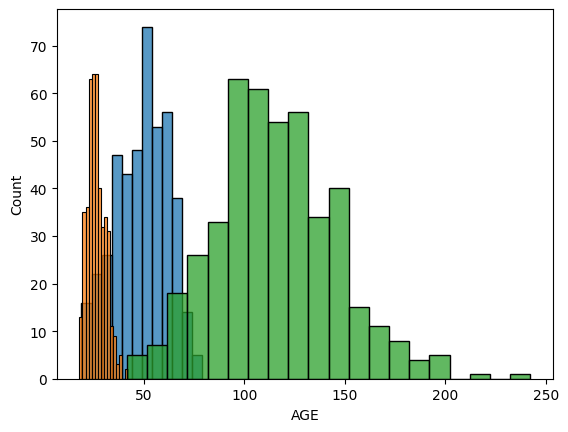

In [40]:
# Plot the distribution of the data
sns.histplot(diabetes_df['AGE'])
sns.histplot(diabetes_df['BMI'])
sns.histplot(diabetes_df['S2'])

For the sake of simplicity, picking three variables at random we can see that the data is Gaussian distributed, therefore we can use the standardization method and use the StandardScaler method.

In [41]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)

X_test_standardized = standard_scaler.transform(X_test)

# Show the first few rows of the standardized data

X_train_standardized_df = pd.DataFrame(X_train_standardized, columns=X.columns)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns=X.columns)

print("Standardized Training Data (First 5 rows):")
print(X_train_standardized_df.head())

print("\nStandardized Test Data (First 5 rows):")
print(X_test_standardized_df.head())

Standardized Training Data (First 5 rows):
        AGE       SEX       BMI        BP        S1        S2        S3  \
0  0.767844  1.067424  1.347413  0.454906 -0.935888 -0.741500 -0.900815   
1 -0.057153 -0.936835 -1.100358 -0.560659 -0.178229 -0.410729  1.521083   
2  1.742841  1.067424  0.974420 -0.125417 -0.965029 -0.728269 -0.673762   
3 -1.857146 -0.936835 -0.237810 -0.778280  0.258882  0.522048 -0.749446   
4  0.092847 -0.936835 -0.773988  0.454906  0.084038  0.323585  0.158766   

         S4        S5        S6  
0 -0.051951  0.440427 -0.359531  
1 -0.808181 -1.457897 -1.937199  
2 -0.051951  0.073705 -0.534828  
3  0.704279  0.500240 -0.184235  
4 -0.051951 -0.676015 -0.973069  

Standardized Test Data (First 5 rows):
        AGE       SEX       BMI        BP        S1        S2        S3  \
0 -1.107149 -0.936835 -1.193606 -0.778280  1.890762 -0.073341  0.158766   
1 -0.507151  1.067424  0.997732  0.454906  2.327873  1.871597  0.007397   
2 -1.557147  1.067424 -0.191186  0.30

Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [42]:
model = LinearRegression()

# Fit the model on the standardized training data

model.fit(X_train_standardized, Y_train)

print("Model Coefficient is: ", model.coef_)
print("Model intercept is: ", model.intercept_)

Model Coefficient is:  [ -0.3910393  -11.83513735  23.75759898  13.93817193 -22.45504292
  10.08719201  -1.63539055   7.1823309   29.70723812   4.08025422]
Model intercept is:  151.4787535410765


Generate predictions for the test set

In [43]:
Y_pred = model.predict(X_test_standardized)

Compute R-squared for your model on the test set. You can use r2_score.


In [44]:
from sklearn.metrics import r2_score

r_squared = r2_score(Y_test, Y_pred)

print(f"R-squared: {r_squared}")


R-squared: 0.5437558023550998


The R-squared is not too close to 1, so the model does not fit our observations as closely as we would like.